In [1]:
import tensorflow as tf
import nibabel as nib
import numpy as np
import pathlib

In [2]:
# directory containing the simulated brain web data sets
data_dir = pathlib.Path('../data/training_data/brainweb')
batch_size = 10

np.random.seed(0)

# get all the subjects paths
subject_paths = list(data_dir.glob('subject??'))

In [3]:
def load_nii_in_lps(fname):
  """ function that loads nifti file and returns the volume and affine in 
      RAS orientation
  """
  nii = nib.load(fname)
  nii = nib.as_closest_canonical(nii)
  vol = np.flip(nii.get_fdata(), (0,1))

  return vol, nii.affine

#------------------------------------------------------------------------------

def load_data_set(subject_path, scan_id = 0):

  # get the subject number from the path
  data_id = int(subject_path.parts[-1][-2:])

  # setup the file names
  mr_file   = pathlib.Path(subject_path) / 't1.nii'
  osem_file = pathlib.Path(subject_path) / f'osem_psf_3_5_{data_id}00{scan_id}.nii'
  target_file = pathlib.Path(subject_path) / f'pet_{data_id}00{scan_id}.nii'

  # load nifti files in RAS orientation
  mr, mr_aff = load_nii_in_lps(mr_file)
  osem, osem_aff = load_nii_in_lps(osem_file)
  target, target_aff = load_nii_in_lps(target_file)

  # normalize the intensities of the MR and PET volumes
  mr_scale   = np.percentile(mr, 99.99)
  osem_scale = np.percentile(osem, 99.99)

  mr     /= mr_scale
  osem   /= osem_scale
  target /= osem_scale

  return osem, mr, target, osem_scale, mr_scale

In [4]:
# directory containing the simulated brain web data sets
data_dir = pathlib.Path('../data/training_data/brainweb')
batch_size = 10

np.random.seed(0)

# get all the subjects paths
subject_paths = list(data_dir.glob('subject??'))

osem_vols   = []
t1_vols     = []
target_vols = []

# load all the data sets
for subject_path in subject_paths:
  print(f'loading {subject_path}')

  data = load_data_set(subject_path, scan_id = 0)

  osem_vols.append(data[0])
  t1_vols.append(data[1])
  target_vols.append(data[2])

osem_vols   = np.array(osem_vols)
t1_vols     = np.array(t1_vols)
target_vols = np.array(target_vols)

x_train = np.stack((osem_vols,t1_vols), axis = -1)
y_train = np.expand_dims(target_vols, -1)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject04


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject05


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject06


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject18


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject20


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject38


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject41


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject42


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject43


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject44


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject45


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject46


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject47


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject48


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject49


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject50


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject51


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject52


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject53


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


loading ../data/training_data/brainweb/subject54


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [5]:
def train_preprocessing(x, y, s0 = 64, s1 = 64, s2 = 64, m0 = (40,40), m1 = (40,40), m2 = (40,40)):
  """data augmentation function for training """

  # extract a random sub volume
  sh0 = tf.cast(tf.math.ceil(s0/2), tf.int32)
  sh1 = tf.cast(tf.math.ceil(s1/2), tf.int32)
  sh2 = tf.cast(tf.math.ceil(s2/2), tf.int32)

  lm0 = tf.math.maximum(sh0, m0[0])
  rm0 = tf.math.maximum(sh0, m0[1])

  lm1 = tf.math.maximum(sh1, m1[0])
  rm1 = tf.math.maximum(sh1, m1[1])

  lm2 = tf.math.maximum(sh2, m2[0])
  rm2 = tf.math.maximum(sh2, m2[1])

  i0 = tf.random.uniform((), minval=lm0, maxval=x.shape[0]-rm0, dtype=tf.dtypes.int32) - sh0
  i1 = tf.random.uniform((), minval=lm1, maxval=x.shape[1]-rm1, dtype=tf.dtypes.int32) - sh1
  i2 = tf.random.uniform((), minval=lm2, maxval=x.shape[2]-rm2, dtype=tf.dtypes.int32) - sh2

  x_crop = tf.slice(x, begin = [i0,i1,i2,0], size = [s0,s1,s2,2])
  y_crop = tf.slice(y, begin = [i0,i1,i2,0], size = [s0,s1,s2,1])

  return x_crop, y_crop

In [6]:
train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))

train_dataset = train_loader.shuffle(len(x_train)).map(lambda x,y: train_preprocessing(x,y, s0 = 129, s1 = 129, s2 = 129)).batch(batch_size).prefetch(2)

In [7]:
b = train_dataset.take(1)

x_batch, y_batch = list(b)[0]

/uz/data/Admin/ngeresearch/georgschramm/pymirc/pymirc/viewer/threeaxisviewer.py:256: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


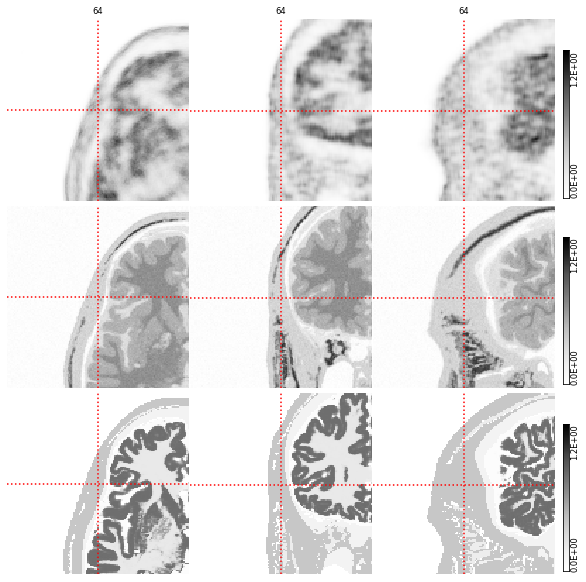

In [8]:
x_batch = x_batch.numpy()
y_batch = y_batch.numpy()

import pymirc.viewer as pv
vi = pv.ThreeAxisViewer([x_batch[0,...,0].squeeze(), x_batch[0,...,1].squeeze(), y_batch[0,...,0].squeeze()],
                        imshow_kwargs = {'vmin':0,'vmax':1.2})